 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
nulls = whale_returns.isnull().sum()
nulls

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csv_path = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csv_path = Path("./Resources/sp500_history.csv")
sp500_history = pd.read_csv(csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_history['Close'] = pd.to_numeric(sp500_history['Close'].str.replace('$', ''), errors='coerce')

c:\Users\Alex\anaconda3\envs\KerasTS\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close': 'SP500 Close'}, inplace=True)
sp500_returns

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
column_appended_data


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

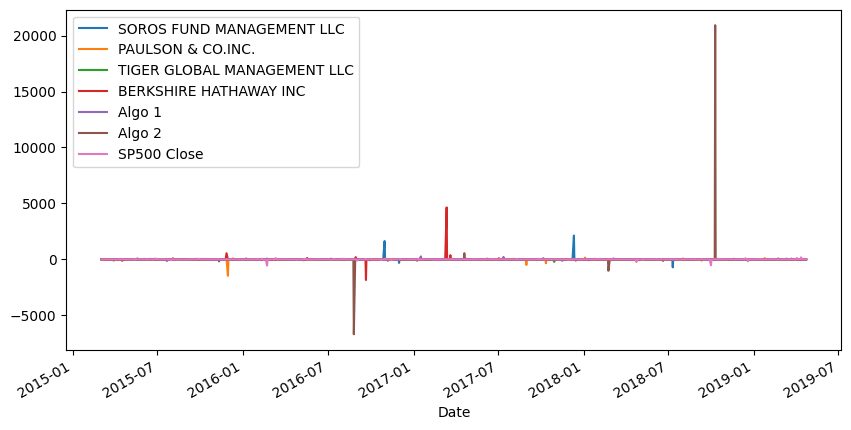

In [15]:
# Plot daily returns of all portfolios
daily_returns = column_appended_data.pct_change()
daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns over the Last 4 Years'}, xlabel='Date'>

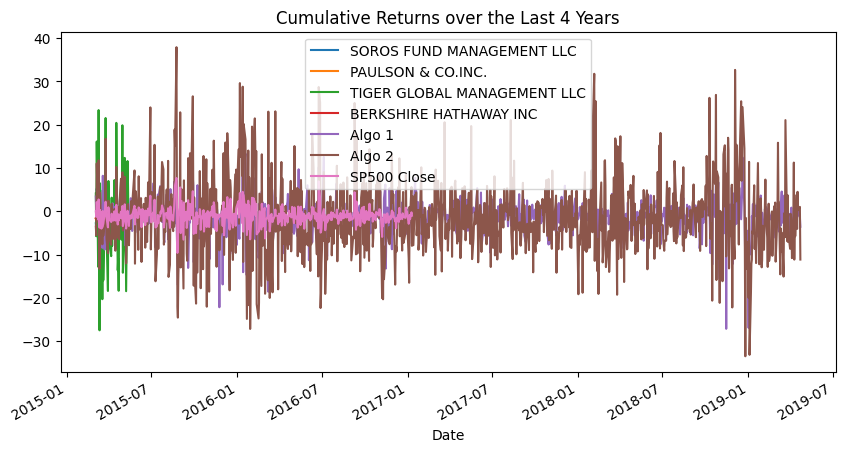

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns over the Last 4 Years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

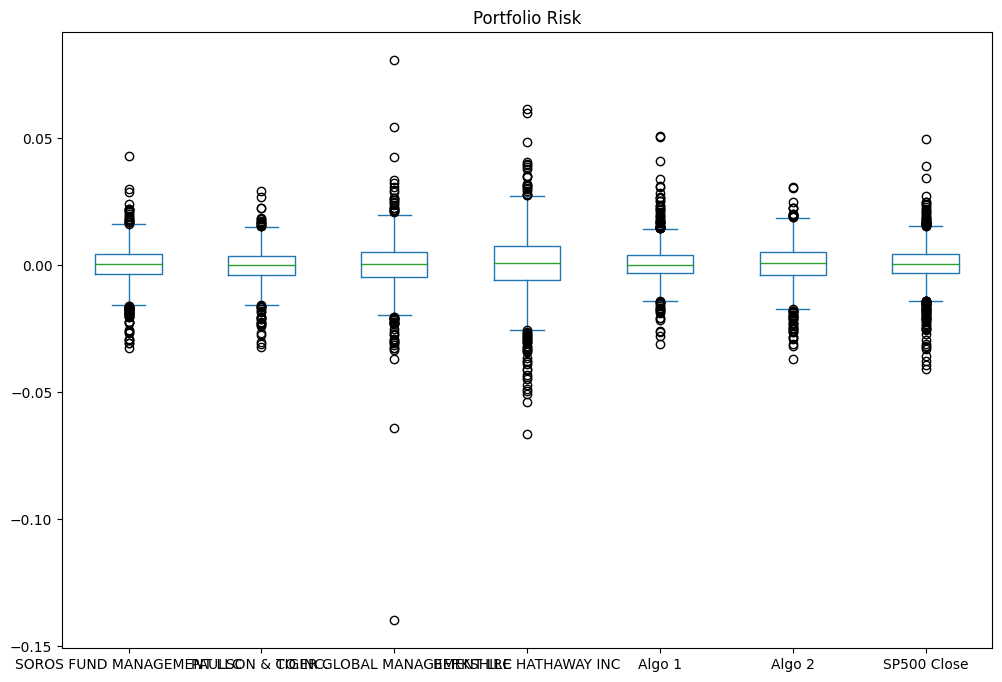

In [17]:
# Box plot to visually show risk
column_appended_data.plot(kind='box', figsize=(12, 8), title="Portfolio Risk")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = column_appended_data.std()
daily_std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std_dev = daily_std_dev['SP500 Close']

# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = daily_std_dev[daily_std_dev > sp500_std_dev]

print("Portfolios riskier than S&P 500:")
print(riskier_than_sp500)

Portfolios riskier than S&P 500:
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
print('\nAnnualized Standard Deviatios;')
print(annualized_std_dev)


Annualized Standard Deviatios;
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Close                    0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

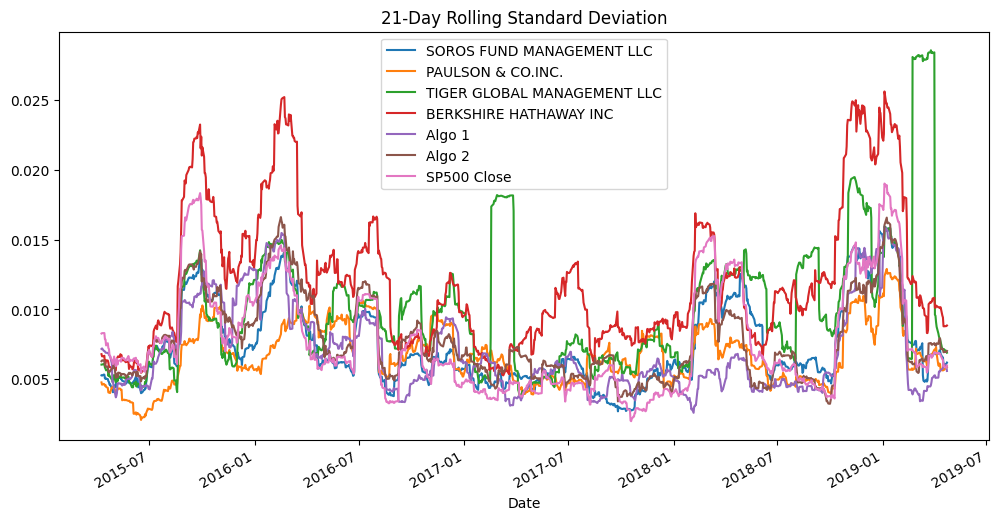

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = column_appended_data.rolling(window=27).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(12,6), title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = column_appended_data.corr()
# Display de correlation matrix
print('\nCorrelation Matrix;"')
print(correlation)


Correlation Matrix;"
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SP500 Close                                   0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
print(sp500_history.columns)

Index(['Close'], dtype='object')


<AxesSubplot:xlabel='Date'>

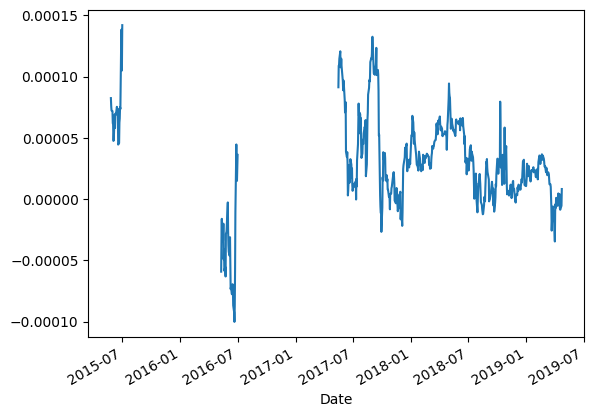

In [24]:
# Calculate covariance of a single portfolio
covariance = whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(sp500_history['Close'])
# Calculate variance of S&P 500
variance = sp500_history['Close'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

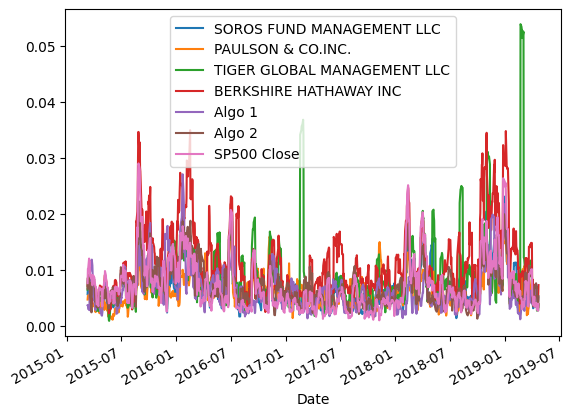

In [25]:
# Use `ewm` to calculate the rolling window
ewm = column_appended_data.rolling(window=7).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (column_appended_data.mean() / column_appended_data.std()) * np.sqrt(252)

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

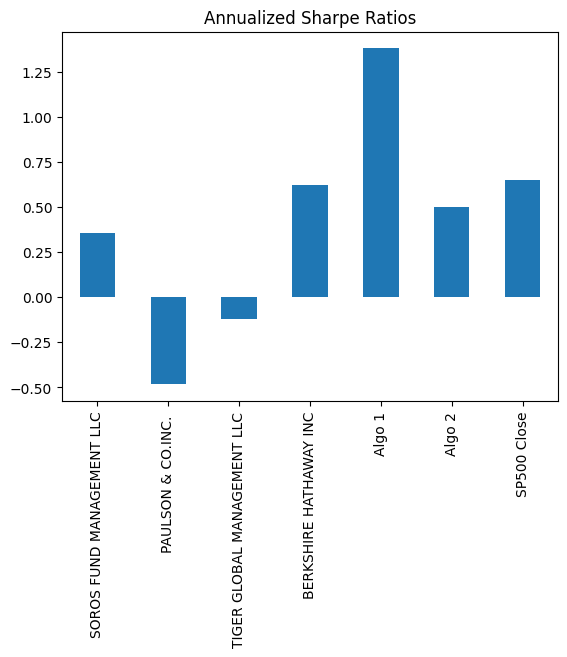

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Algo 1 performed really well beating out sp500, and whale portfolios, algo 2 however only managed to beat a few whale Management firms while coming short to SP500 Close and Algo 1 and BerkshireHaway INC.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
csv_path = Path("./Resources/celh_historical.csv")
celh_history = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
celh_history.sort_index(inplace=True)
celh_history.index = celh_history.index.date
celh_history.head()

,Close
2015-03-02,0.37
2015-03-03,0.35
2015-03-04,0.33
2015-03-05,0.31
2015-03-06,0.31


In [29]:
# Reading data from 2nd stock
csv_path = Path("./Resources/nvda_historical.csv")
nvda_history = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
nvda_history.sort_index(inplace=True)
nvda_history.index = nvda_history.index.date
nvda_history.head()

,Close
2015-03-02,5.65
2015-03-03,5.55
2015-03-04,5.61
2015-03-05,5.72
2015-03-06,5.64


In [30]:
# Reading data from 3rd stock
csv_path = Path("./Resources/tsla_historical.csv")
tsla_history = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_history.sort_index(inplace=True)
tsla_history.index = tsla_history.index.date
tsla_history.head()

,Close
2015-03-02,13.16
2015-03-03,13.30
2015-03-04,13.50
2015-03-05,13.38
2015-03-06,12.93


In [31]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([celh_history, nvda_history, tsla_history], axis='columns', join='inner')
combined_df.head()

,Close,Close,Close
2015-03-02,0.37,5.65,13.16
2015-03-03,0.35,5.55,13.30
2015-03-04,0.33,5.61,13.50
2015-03-05,0.31,5.72,13.38
2015-03-06,0.31,5.64,12.93


In [32]:
# Reset Date index
combined_df.reset_index(inplace=True)

In [33]:
# Reorganize portfolio data by having a column per symbol
combined_df = pd.concat([celh_history['Close'].rename('CELH'), nvda_history['Close'].rename('NVDA'), tsla_history['Close'].rename('TSLA')], axis=1)
combined_df.head()  

,CELH,NVDA,TSLA
2015-03-02,0.37,5.65,13.16
2015-03-03,0.35,5.55,13.30
2015-03-04,0.33,5.61,13.50
2015-03-05,0.31,5.72,13.38
2015-03-06,0.31,5.64,12.93


In [34]:
# Calculate daily returns
myport = combined_df.pct_change()
# Drop NAs
myport.dropna(inplace=True)
# Display sample data
print(myport.head())

                CELH      NVDA      TSLA
2015-03-03 -0.054054 -0.017699  0.010638
2015-03-04 -0.057143  0.010811  0.015038
2015-03-05 -0.060606  0.019608 -0.008889
2015-03-06  0.000000 -0.013986 -0.033632
2015-03-09 -0.032258  0.001773 -0.015468


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = myport.multiply(weights).sum(axis=1)
# Display sample data
weighted_returns.head()

2015-03-03   -0.020372
2015-03-04   -0.010431
2015-03-05   -0.016629
2015-03-06   -0.015873
2015-03-09   -0.015318
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
column_appended_data.dropna(inplace=True)
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
annualized_std = myport.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}>

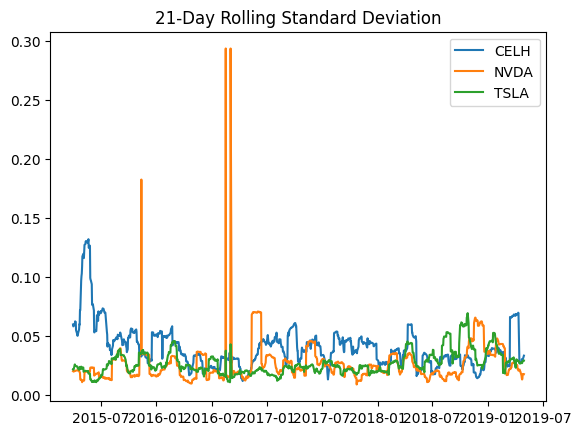

In [38]:
# Calculate rolling standard deviation
rolling_std_21 = myport.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_21.plot(title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation Matrix'}>

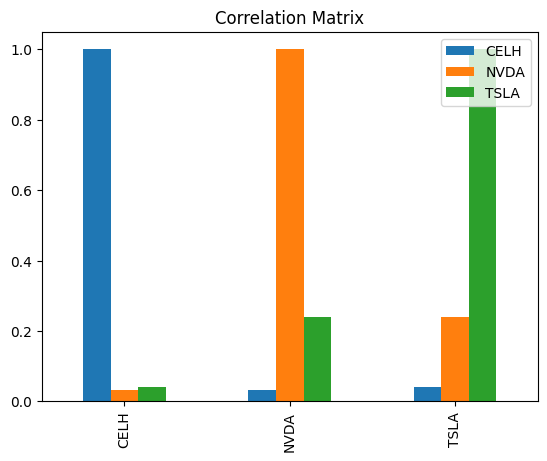

In [39]:
# Calculate and plot the correlation
correlation = myport.corr()
correlation.plot(kind='bar', title='Correlation Matrix')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio and S&P 500 2015-2019'}, xlabel='Date'>

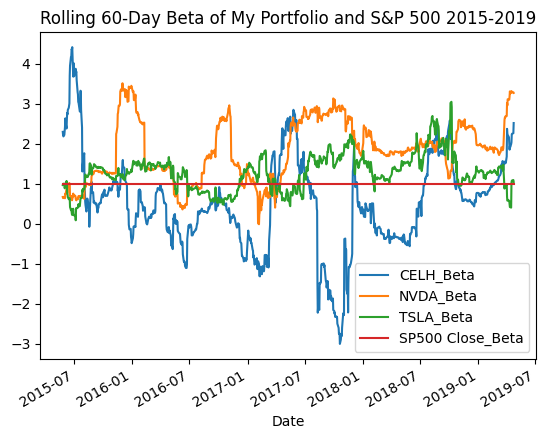

In [40]:
# Calculate and plot Beta
# Initialize a DataFrame to hold the rolling betas
rolling_beta_60 = pd.DataFrame(index=sp500_returns.index)

# Calculate rolling variance of S&P 500 returns for the same 60-day window
rolling_variance = sp500_returns.rolling(window=60).var()

# Calculate rolling covariance and variance to compute beta for each stock in 'myport'
# and also for the S&P 500 against itself
for stock in myport.columns.tolist() + ['SP500 Close']:
    # For the S&P 500, we set the rolling covariance with itself, which will be the rolling variance
    if stock == 'SP500 Close':
        rolling_covariance = rolling_variance
    else:
        rolling_covariance = myport[stock].rolling(window=60).cov(sp500_returns)
    
    rolling_beta = rolling_covariance / rolling_variance
    column_name = f'{stock}_Beta'
    rolling_beta_60[column_name] = rolling_beta  # Store each beta in the DataFrame with a new column name

# Filter for the desired date range
filtered_rolling_beta_60 = rolling_beta_60.loc['2015-03-03':'2019-04-23']

# Drop any NaN values from the resulting DataFrame to clean up the data for plotting
filtered_rolling_beta_60 = filtered_rolling_beta_60.dropna()

# Plot the filtered rolling beta
filtered_rolling_beta_60.plot(title='Rolling 60-Day Beta of My Portfolio and S&P 500 2015-2019')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = column_appended_data.mean() / column_appended_data.std()
sharpe_ratios_annualized = sharpe_ratios * np.sqrt(252)

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

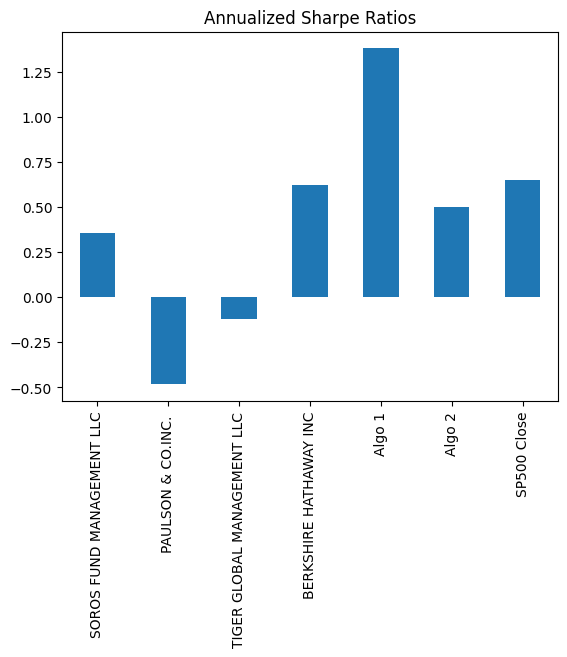

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_annualized.plot(kind= 'bar', title='Annualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

Two of my stocks performed well CELH and NVDA beating the SP500 and Algo 2 and Berkshire Haway INC, while my third stock TSLA came up short compared to the Algo and Berkshire. Even with my appealing portfolio from the charts I would consider using Algo 1.